<a href="https://colab.research.google.com/github/SeventhWarhawk/MIT805_Part1/blob/main/MIT805_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object
   VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  passenger_count  \
0         1  02/14/2018 01:38:35 PM  02/14/2018 01:40:39 PM                1   
1         1  02/14/2018 01:52:21 PM  02/14/2018 02:10:43 PM                1   
2         2  02/14/2018 01:40:00 PM  02/14/2018 01:49:16

/tmp/ipython-input-2367095483.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
/tmp/ipython-input-2367095483.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


Dropoff before pickup: 0


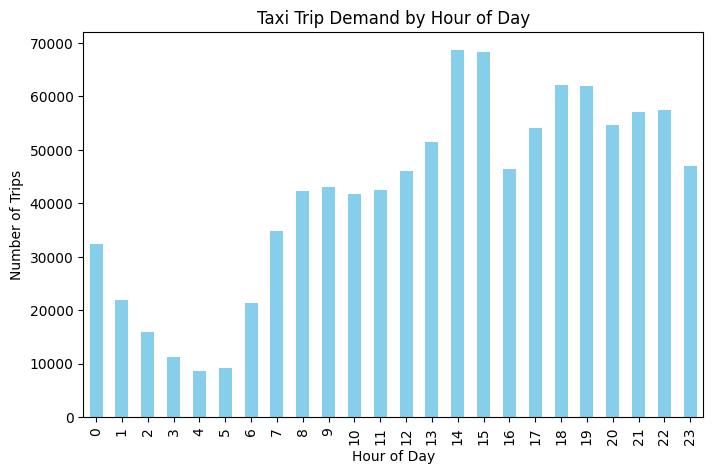

In [13]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read dataset into dataframe
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/2018_Yellow_Taxi_Trip_Data_20250910.csv',nrows=1000000)

# Variety Check:
print(df.dtypes)
print(df.head())

# Veracity Check:
print("Negative or zero fares:", (df['fare_amount'] <= 0).sum())
print("Zero distance but fare > 0:", ((df['trip_distance'] == 0) & (df['fare_amount'] > 0)).sum())
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
print("Dropoff before pickup:", (df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']).sum())

# Visualization Check:
import pandas as pd
import matplotlib.pyplot as plt

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

df['hour'] = df['tpep_pickup_datetime'].dt.hour

hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(8,5))
hourly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Taxi Trip Demand by Hour of Day')
plt.show()



In [ ]:
£